# Download Dataset 

In [1]:
import kagglehub

dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Dataset downloaded.')


C:\Users\Rifat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset downloaded.


# Dataset Loading and Preprocessing

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
print(os.listdir(dataset))

['animals', 'images']


In [4]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'cats', 'dogs', 'images', 'panda']


In [5]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['cats', 'dogs', 'panda']


In [6]:
categories = os.listdir(dataset)
print(categories)

['cats', 'dogs', 'panda']


In [7]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['cats_00001.jpg', 'cats_00002.jpg', 'cats_00003.jpg', 'cats_00004.jpg', 'cats_00005.jpg', 'cats_00006.jpg', 'cats_00007.jpg', 'cats_00008.jpg', 'cats_00009.jpg', 'cats_00010.jpg', 'cats_00011.jpg', 'cats_00012.jpg', 'cats_00013.jpg', 'cats_00014.jpg', 'cats_00015.jpg', 'cats_00016.jpg', 'cats_00017.jpg', 'cats_00018.jpg', 'cats_00019.jpg', 'cats_00020.jpg', 'cats_00021.jpg', 'cats_00022.jpg', 'cats_00023.jpg', 'cats_00024.jpg', 'cats_00025.jpg', 'cats_00026.jpg', 'cats_00027.jpg', 'cats_00028.jpg', 'cats_00029.jpg', 'cats_00030.jpg', 'cats_00031.jpg', 'cats_00032.jpg', 'cats_00033.jpg', 'cats_00034.jpg', 'cats_00035.jpg', 'cats_00036.jpg', 'cats_00037.jpg', 'cats_00038.jpg', 'cats_00039.jpg', 'cats_00040.jpg', 'cats_00041.jpg', 'cats_00042.jpg', 'cats_00043.jpg', 'cats_00044.jpg', 'cats_00045.jpg', 'cats_00046.jpg', 'cats_00047.jpg', 'cats_00048.jpg', 'cats_00049.jpg', 'cats_00050.jpg', 'cats_00051.jpg', 'cats_00052.jpg', 'cats_00053.jpg', 'cats_00054.jpg', 'cats_00055.jpg', 'cats_00

In [8]:
import random

train_data = []
max_images_per_class = 100

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)

    image_files = os.listdir(path)[:max_images_per_class]

    for img in tqdm(image_files, desc=f"Loading {category}"):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)

        if img_bgr is None:
            continue

        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_gray, (32, 32))
        train_data.append((img_array, label))

Loading panda: 100%|██████████| 100/100 [00:00<00:00, 147.08it/s]


In [9]:
print(f"Total loaded samples: {len(train_data)}")

Total loaded samples: 300


In [10]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
np.random.shuffle(train_data)

In [12]:
print([train_data[i][1] for i in range(10)])

[2, 2, 0, 1, 0, 2, 0, 0, 2, 0]


# Visualizing

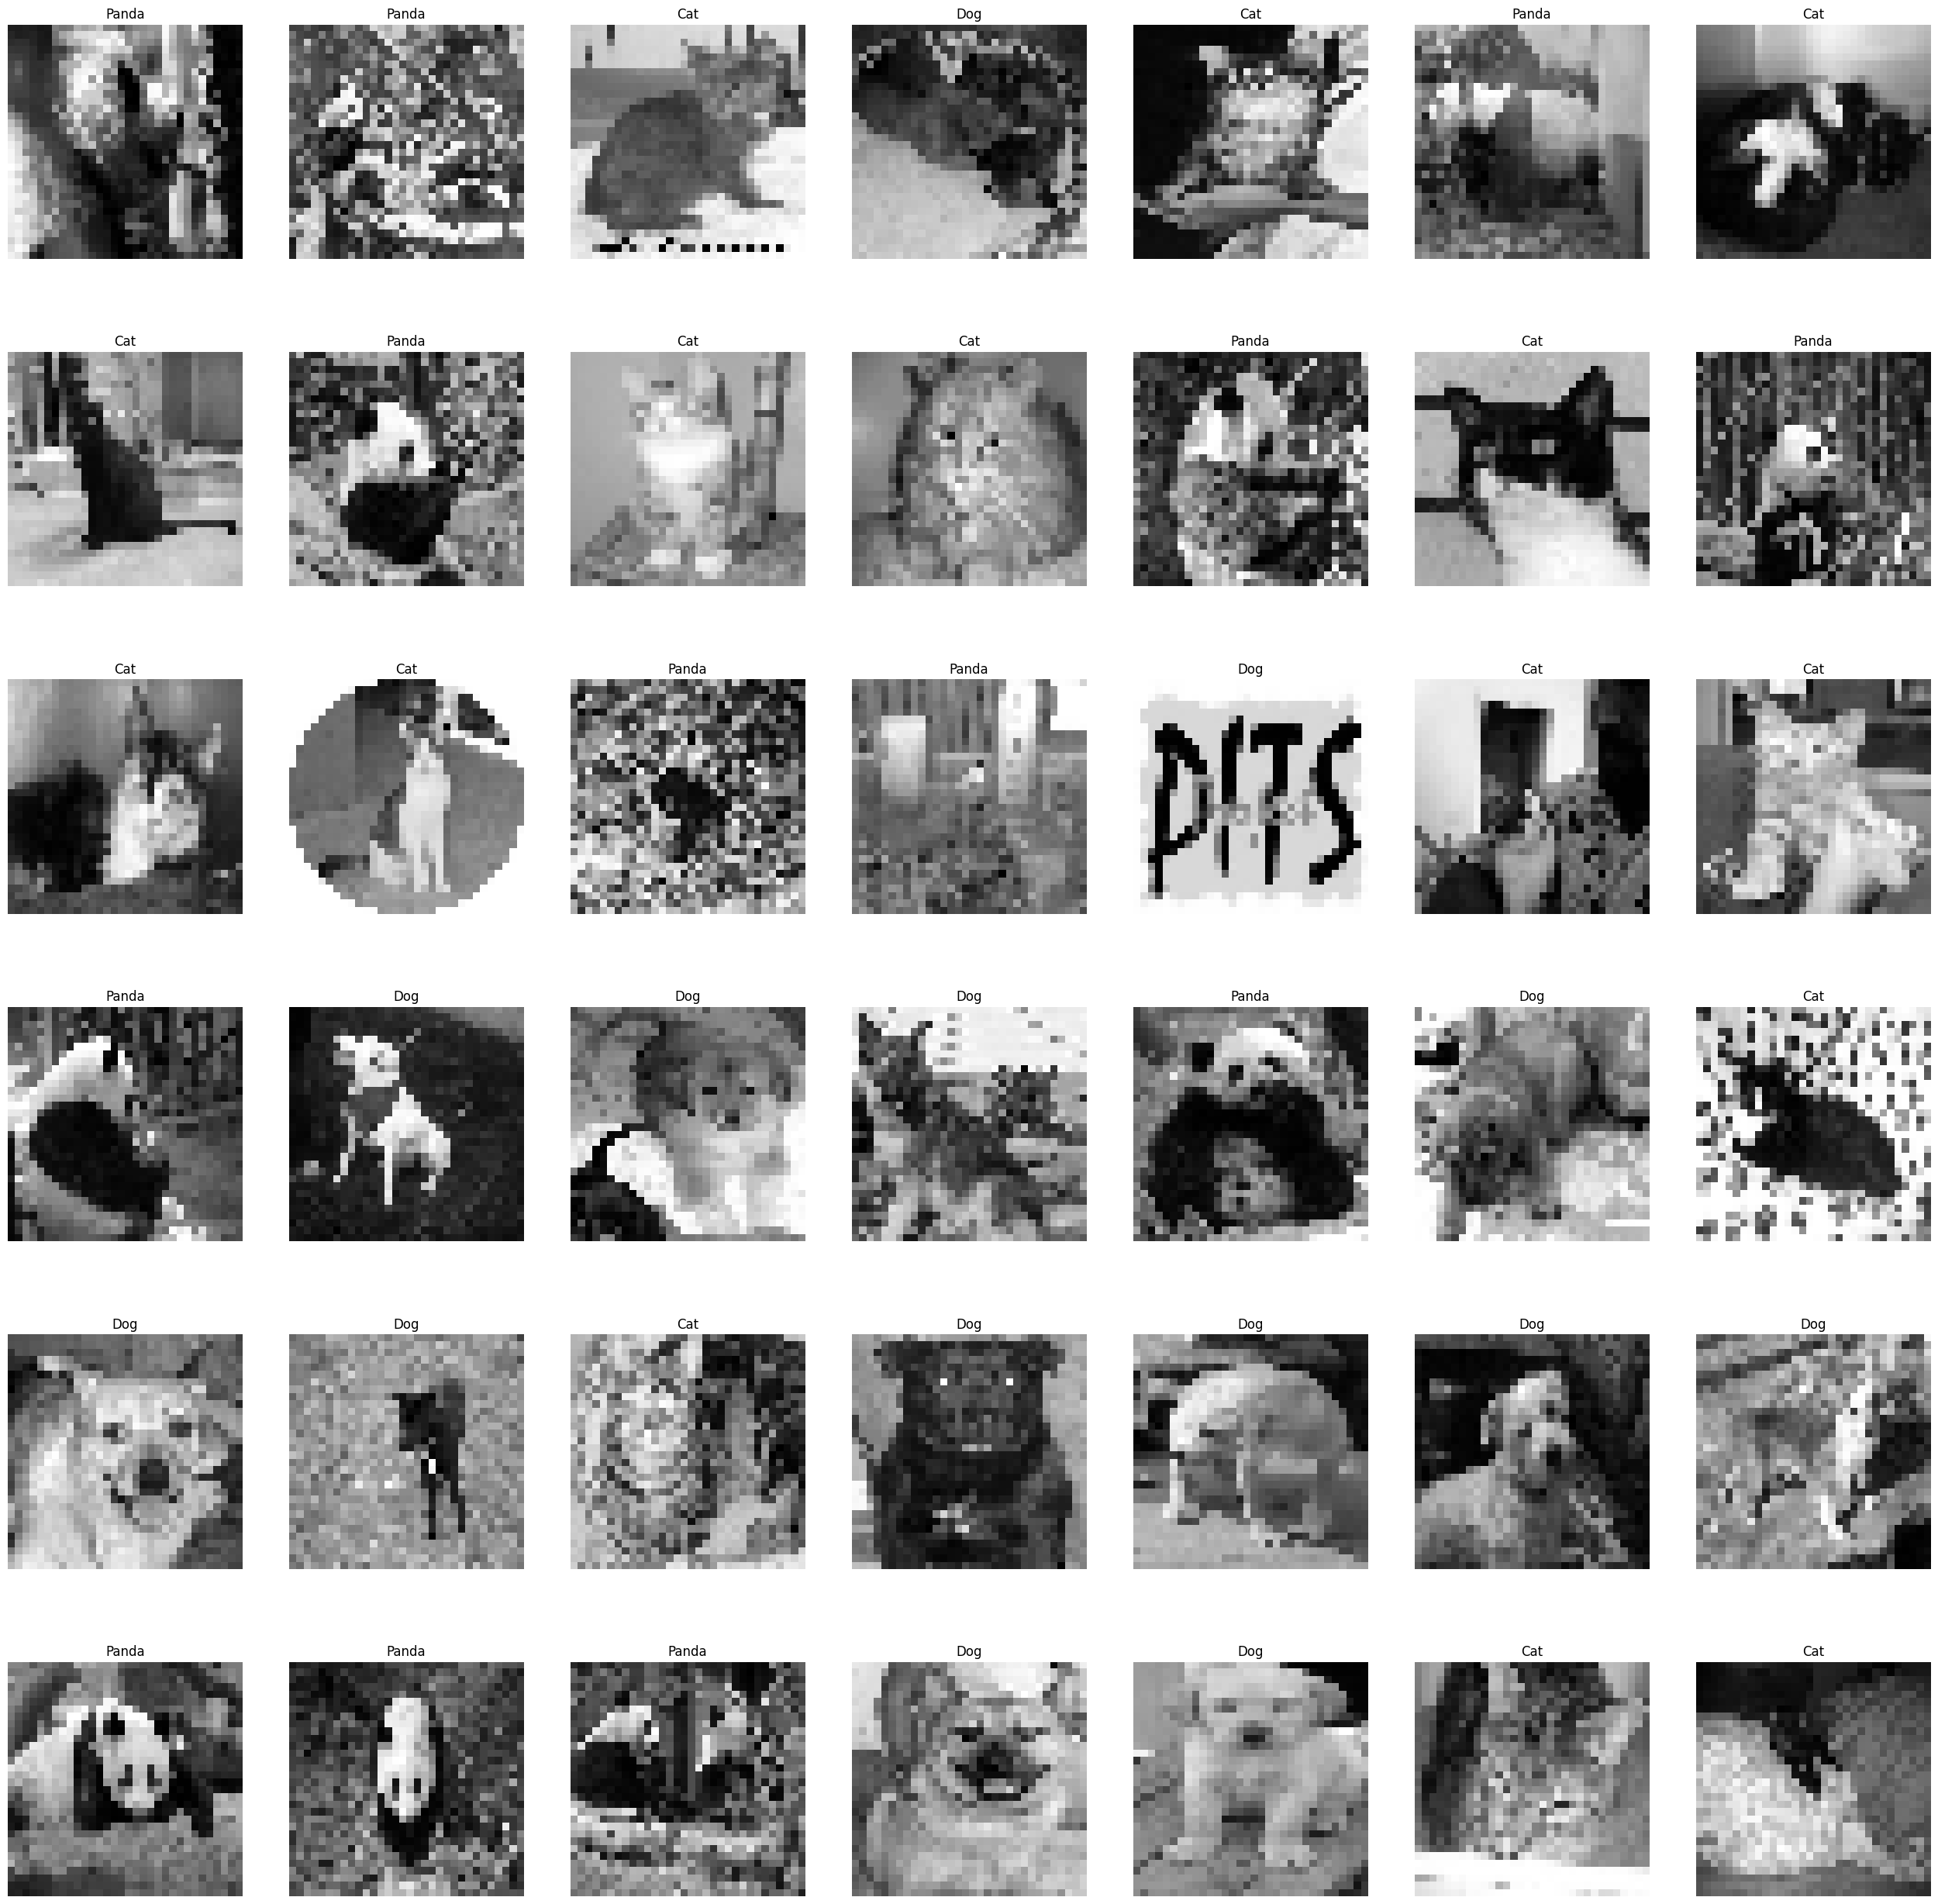

In [13]:
fig, axes = plt.subplots(6, 7, figsize=(32, 32))
label_names = ['Cat', 'Dog', 'Panda']
for (img_array, label), ax in zip(train_data, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label_names[label])
    ax.axis('off')

plt.show()

# Cross-Validation



In [14]:
folds = [train_data[i::5] for i in range(5)]
len(folds)

5

In [15]:
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}:")
    print(f"Labels: {labels}")
    print(f"Count: {len(fold)}")
    print(f" ")

Fold 1:
Labels: [2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2]
Count: 60
 
Fold 2:
Labels: [2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0]
Count: 60
 
Fold 3:
Labels: [0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2]
Count: 60
 
Fold 4:
Labels: [1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2]
Count: 60
 
Fold 5:
Labels: [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 

# Calculating L2 Distance (Euclidean Distance)

In [16]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))


# Calculating L1 Distance (Manhattan Distance)

In [17]:
def l1_distance(valid_img, train_img):
    return np.sum(np.abs(valid_img - train_img))

# k-Nearest Neighbors (kNN) Prediction



In [18]:
from collections import Counter

def knn_prediction(distances, k=1):
    nearest_neighbors = distances[:k]
    labels = [label for _, label in nearest_neighbors]
    label_counts = Counter(labels)
    most_common_label = label_counts.most_common(1)[0][0]

    return most_common_label

# L2 k-Nearest Neighbors (kNN) Cross-Validation with Accuracy



In [19]:
fold_accuracies_2 = []  
avg_accuracies_2 = []  

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l2_distances = []   
      for train_img in train_set:
        distance = l2_distance(valid_img[0], train_img[0])
        l2_distances.append((distance, train_img[1]))
      l2_distances.sort()
      predicted_label = knn_prediction(l2_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)   
    accuracies.append(fold_accuracy)

  fold_accuracies_2.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies_2.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies_2}")
print(f"Average Fold Accuracies: {avg_accuracies_2}")

K: 1 Average Accuracy: 0.39
K: 2 Average Accuracy: 0.39
K: 3 Average Accuracy: 0.39
K: 4 Average Accuracy: 0.42
K: 5 Average Accuracy: 0.39
K: 6 Average Accuracy: 0.42
K: 7 Average Accuracy: 0.39
K: 8 Average Accuracy: 0.40
K: 9 Average Accuracy: 0.41
K: 10 Average Accuracy: 0.40
K: 11 Average Accuracy: 0.41
K: 12 Average Accuracy: 0.44
K: 13 Average Accuracy: 0.41
K: 14 Average Accuracy: 0.41
K: 15 Average Accuracy: 0.42
K: 16 Average Accuracy: 0.41
K: 17 Average Accuracy: 0.42
K: 18 Average Accuracy: 0.42
K: 19 Average Accuracy: 0.42
K: 20 Average Accuracy: 0.43
K: 21 Average Accuracy: 0.40
K: 22 Average Accuracy: 0.43
K: 23 Average Accuracy: 0.40
K: 24 Average Accuracy: 0.42
K: 25 Average Accuracy: 0.44
K: 26 Average Accuracy: 0.44
K: 27 Average Accuracy: 0.43
K: 28 Average Accuracy: 0.44
K: 29 Average Accuracy: 0.44
K: 30 Average Accuracy: 0.42
Fold Accuracies: [[0.3333333333333333, 0.45, 0.4666666666666667, 0.35, 0.35], [0.3333333333333333, 0.45, 0.4666666666666667, 0.35, 0.35], [

# L1 k-Nearest Neighbors (kNN) Cross-Validation with Accuracy



In [20]:
fold_accuracies_1 = []  
avg_accuracies_1 = []  

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l1_distances = []   
      for train_img in train_set:
        distance = l1_distance(valid_img[0], train_img[0])
        l1_distances.append((distance, train_img[1]))
      l1_distances.sort()
      predicted_label = knn_prediction(l1_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)   
    accuracies.append(fold_accuracy)

  fold_accuracies_1.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies_1.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies_1}")
print(f"Average Fold Accuracies: {avg_accuracies_1}")

K: 1 Average Accuracy: 0.43
K: 2 Average Accuracy: 0.43
K: 3 Average Accuracy: 0.44
K: 4 Average Accuracy: 0.47
K: 5 Average Accuracy: 0.45
K: 6 Average Accuracy: 0.45
K: 7 Average Accuracy: 0.41
K: 8 Average Accuracy: 0.46
K: 9 Average Accuracy: 0.44
K: 10 Average Accuracy: 0.45
K: 11 Average Accuracy: 0.42
K: 12 Average Accuracy: 0.43
K: 13 Average Accuracy: 0.42
K: 14 Average Accuracy: 0.44
K: 15 Average Accuracy: 0.43
K: 16 Average Accuracy: 0.43
K: 17 Average Accuracy: 0.43
K: 18 Average Accuracy: 0.43
K: 19 Average Accuracy: 0.43
K: 20 Average Accuracy: 0.41
K: 21 Average Accuracy: 0.41
K: 22 Average Accuracy: 0.41
K: 23 Average Accuracy: 0.42
K: 24 Average Accuracy: 0.41
K: 25 Average Accuracy: 0.42
K: 26 Average Accuracy: 0.40
K: 27 Average Accuracy: 0.39
K: 28 Average Accuracy: 0.39
K: 29 Average Accuracy: 0.39
K: 30 Average Accuracy: 0.39
Fold Accuracies: [[0.5, 0.38333333333333336, 0.36666666666666664, 0.45, 0.45], [0.5, 0.38333333333333336, 0.36666666666666664, 0.45, 0.45],

# Visualizing Cross-validation Accuracy

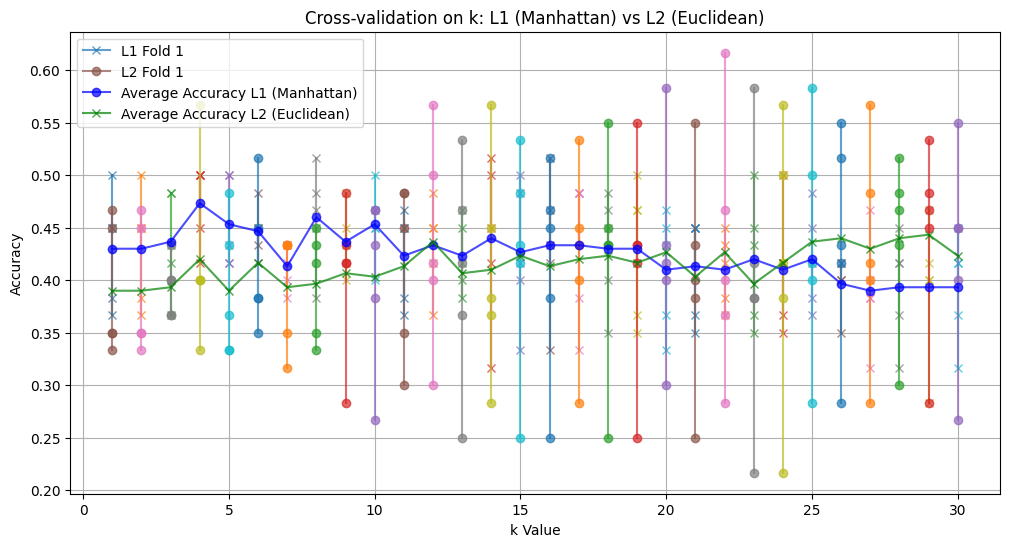

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

colors = plt.cm.tab10.colors

for k in range(30):
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='x', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='o', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='x')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

plt.grid(True)
plt.legend()

plt.show()

# Head 5 predictions Euclidean (L2)

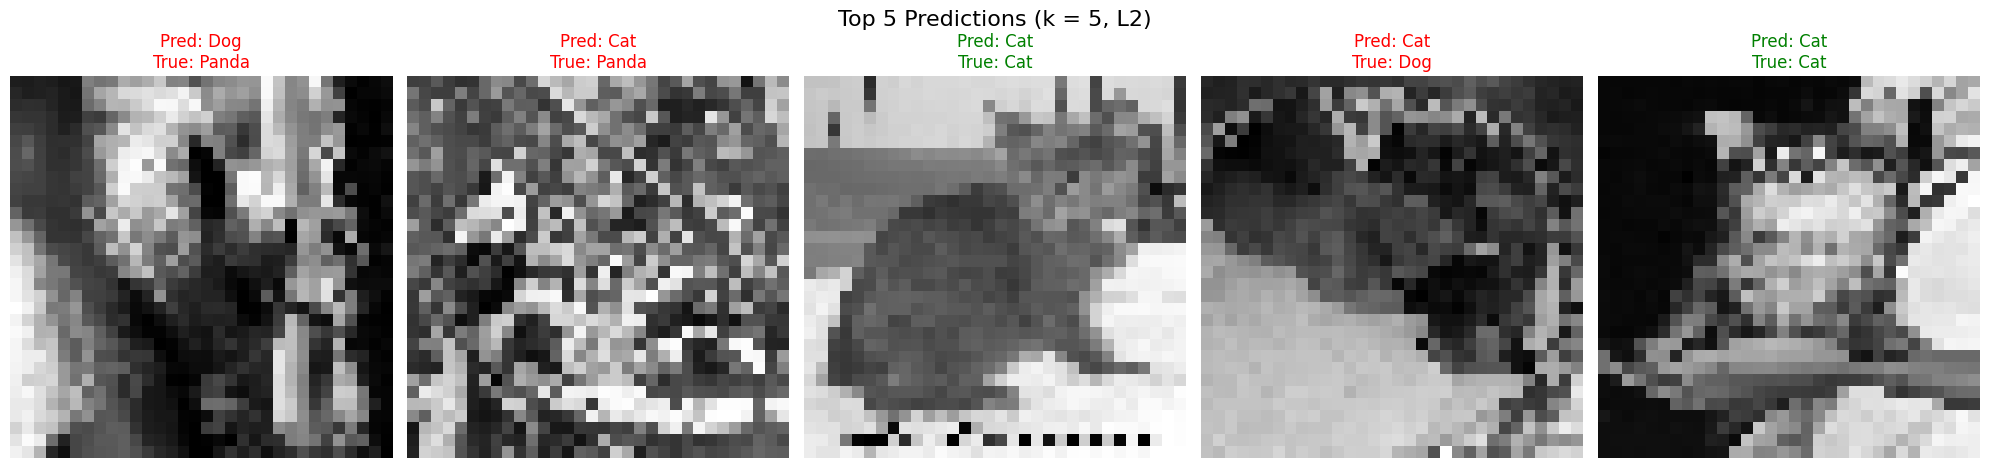

In [22]:
test_samples = train_data[:5]

k_best = 5
distance_function = l2_distance

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
label_names = ['Cat', 'Dog', 'Panda']
for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {label_names[predicted_label]}\nTrue: {label_names[true_label]}", color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"Top 5 Predictions (k = {k_best}, {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16)
plt.tight_layout()
plt.show()


# Head 5 predictions Manhattan (L1)

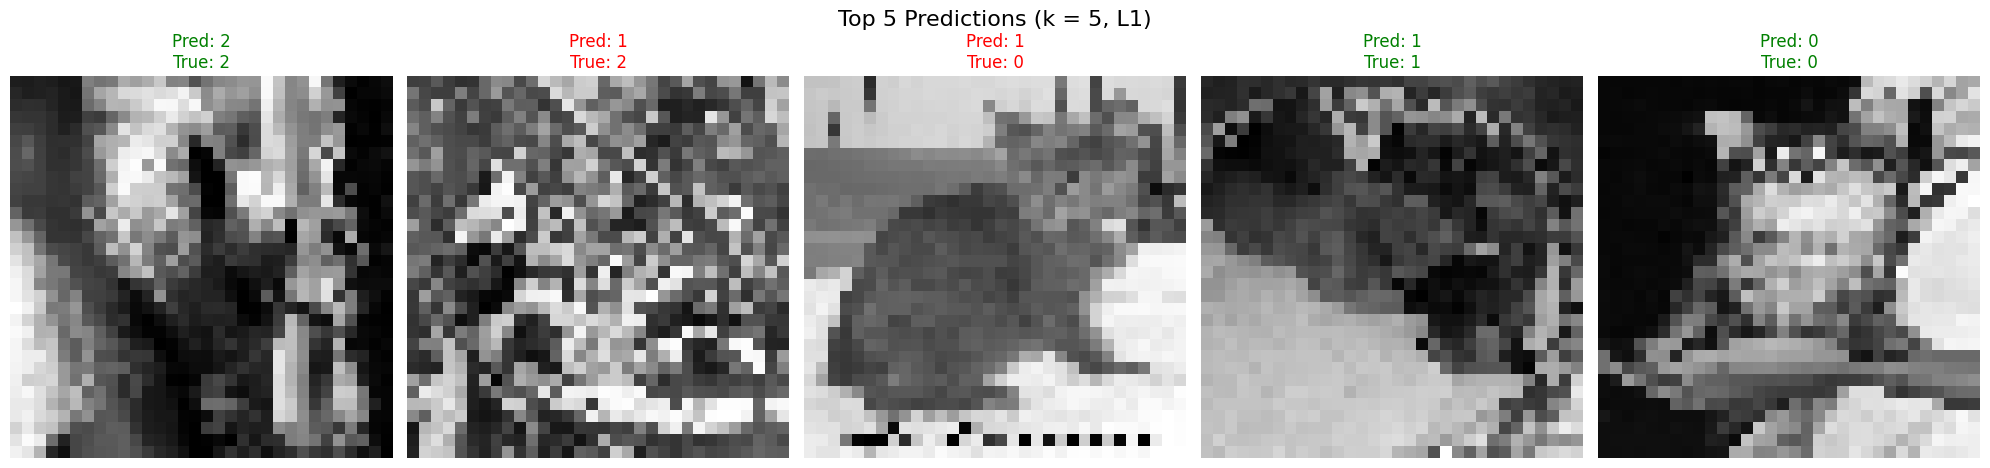

In [23]:
test_samples = train_data[:5]

k_best = 5
distance_function = l1_distance

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}", color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"Top 5 Predictions (k = {k_best}, {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16)
plt.tight_layout()
plt.show()

# Discussion :
For all values of K, the k-NN classifier employing Euclidean (L2) distance consistently performed better than Manhattan (L1) distance, per the results of the 5-fold cross-valuation.   In this grayscale image classification test, L1 showed a significant advantage, scoring 47% (at K=4).  At K=25 and 29, however, L2 had the highest accuracy of 44%.   The features of the pixel-based image surely have an impact on this performance disparity.   Particularly in a lower-dimensional environment like 32x32, Euclidean distance may be better at capturing shape and intensity variations among animal photographs since it penalizes larger pixel disparities more harshly.   Since L2 is less sensitive to these differences, it may be less successful in differentiating across similar visual classes, like cats and dogs. This demonstrates the advantage of smoothing predictions with more neighbors, especially when working with visually noisy or unclear data.  Two disadvantages of this approach include the high processing cost of k-NN during inference times and the use of raw pixel values, which might not capture higher-level patterns.  Future studies might include dimensionality reduction, feature extraction techniques, or more complex models like convolutional neural networks (CNNs) to increase accuracy.